In [1]:
# Import libraries
import pandas_datareader as web
import pandas as pd
import datetime as dt
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
import warnings

In [8]:
start = dt.datetime(2014,1,1)
end = dt.datetime(2020,12,30)

crypto_currency = 'BTC'
against_currency = 'USD'

data = web.DataReader(f'{crypto_currency}-{against_currency}', 'yahoo', start, end)

In [4]:
start_test = dt.datetime(2021,1,1)
end_test = dt.datetime.now()

test_data = web.DataReader(f'{crypto_currency}-{against_currency}', 'yahoo', start_test, end_test)

In [9]:
data = data.reset_index()
data.head()

,Date,High,Low,Open,Close,Volume,Adj Close
0,2014-09-16,468.174011,452.421997,465.864014,457.334015,21056800.0,457.334015
1,2014-09-17,456.859985,413.104004,456.859985,424.440002,34483200.0,424.440002
2,2014-09-18,427.834991,384.532013,424.102997,394.795990,37919700.0,394.795990
3,2014-09-19,423.295990,389.882996,394.673004,408.903992,36863600.0,408.903992
4,2014-09-20,412.425995,393.181000,408.084991,398.821014,26580100.0,398.821014


In [10]:
test_data = test_data.reset_index()
test_data.head()

,Date,High,Low,Open,Close,Volume,Adj Close
0,2020-12-31,29244.876953,28201.992188,28841.574219,29001.720703,46754964848,29001.720703
1,2021-01-01,29600.626953,28803.585938,28994.009766,29374.152344,40730301359,29374.152344
2,2021-01-02,33155.117188,29091.181641,29376.455078,32127.267578,67865420765,32127.267578
3,2021-01-03,34608.558594,32052.316406,32129.408203,32782.023438,78665235202,32782.023438
4,2021-01-04,33440.218750,28722.755859,32810.949219,31971.914062,81163475344,31971.914062


In [15]:
print(data.info())
print("\n")
print(test_data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2293 entries, 0 to 2292
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   Date       2293 non-null   datetime64[ns]
 1   High       2293 non-null   float64       
 2   Low        2293 non-null   float64       
 3   Open       2293 non-null   float64       
 4   Close      2293 non-null   float64       
 5   Volume     2293 non-null   float64       
 6   Adj Close  2293 non-null   float64       
dtypes: datetime64[ns](1), float64(6)
memory usage: 125.5 KB
None


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 253 entries, 0 to 252
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   Date       253 non-null    datetime64[ns]
 1   High       253 non-null    float64       
 2   Low        253 non-null    float64       
 3   Open       253 non-null    float64       
 4   Close      2

In [17]:
print(data.describe())
print("\n")
print(test_data.describe())

               High           Low          Open         Close        Volume  \
count   2293.000000   2293.000000   2293.000000   2293.000000  2.293000e+03   
mean    5027.992189   4776.039363   4902.688298   4914.940651  9.052853e+09   
std     4924.252885   4642.955547   4781.444462   4806.605529  1.276311e+10   
min      211.731003    171.509995    176.897003    178.102997  5.914570e+06   
25%      450.377991    438.822998    444.726990    444.669006  6.205390e+07   
50%     3950.250000   3817.409424   3880.780029   3892.350098  3.159090e+09   
75%     8602.401367   8183.350098   8370.049805   8374.686523  1.545352e+10   
max    28937.740234  27360.089844  27360.089844  28840.953125  7.415677e+10   

          Adj Close  
count   2293.000000  
mean    4914.940651  
std     4806.605529  
min      178.102997  
25%      444.669006  
50%     3892.350098  
75%     8374.686523  
max    28840.953125  


               High           Low          Open         Close        Volume  \
count    

In [18]:
data.isnull().sum()
test_data.isnull().sum()

Date         0
High         0
Low          0
Open         0
Close        0
Volume       0
Adj Close    0
dtype: int64

In [19]:
df_train = data.copy()
df_valid = test_data.copy()

In [20]:
print("Train shape: ", df_train.shape)
print("Test shape: ", df_valid.shape)

Train shape:  (2293, 7)
Test shape:  (253, 7)


ARIMA MODEl

In [22]:
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.stattools import kpss
from statsmodels.tsa.stattools import adfuller
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
import pmdarima as pm

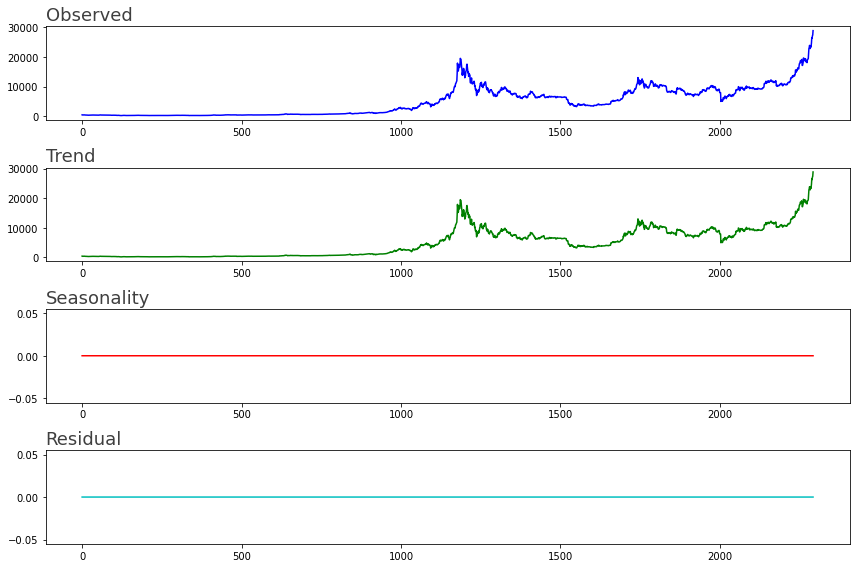

In [23]:
decomposition = sm.tsa.seasonal_decompose(data.Close,period=1)

trend = decomposition.trend
seasonal = decomposition.seasonal
residual = decomposition.resid

ax, fig = plt.subplots(figsize=(12,8), sharex=True)

plt.subplot(411)
plt.plot(data.Close,label='Original', color='b')
plt.title("Observed", loc="left", alpha=0.75, fontsize=18)

plt.subplot(412)
plt.plot(trend, label='Trend', color='g')
plt.title("Trend", loc="left", alpha=0.75, fontsize=18)

plt.subplot(413)
plt.plot(seasonal, label='Seasonality', color='r')
plt.title("Seasonality", loc="left", alpha=0.75, fontsize=18)

plt.subplot(414)
plt.plot(residual, label='Residual', color='c')
plt.title("Residual", loc="left", alpha=0.75, fontsize=18)
plt.tight_layout()

In [24]:
print("Dickey-Fuller stationary test: @=%f" % sm.tsa.adfuller(data["Close"])[1])

Dickey-Fuller stationary test: @=0.997377


In [33]:
lag_features = ["Open", "High", "Low", "Close", "Volume"]
window_1 = 3
window_2 = 7
window_3 = 30

df_train_rolled_3d = df_train[lag_features].rolling(window=window_1, min_periods=0)
df_train_rolled_7d = df_train[lag_features].rolling(window=window_2, min_periods=0)
df_train_rolled_30d = df_train[lag_features].rolling(window=window_3, min_periods=0)

df_train_mean_3d = df_train_rolled_3d.mean().shift(1)
df_train_mean_7d = df_train_rolled_7d.mean().shift(1)
df_train_mean_30d = df_train_rolled_30d.mean().shift(1)

df_train_std_3d = df_train_rolled_3d.std().shift(1)
df_train_std_7d = df_train_rolled_7d.std().shift(1)
df_train_std_30d = df_train_rolled_30d.std().shift(1)

for feature in lag_features:
    df_train[f"{feature}_mean_lag{window_1}"] = df_train_mean_3d[feature]
    df_train[f"{feature}_mean_lag{window_2}"] = df_train_mean_7d[feature]
    df_train[f"{feature}_mean_lag{window_3}"] = df_train_mean_30d[feature]
    
    df_train[f"{feature}_std_lag{window_1}"] = df_train_std_3d[feature]
    df_train[f"{feature}_std_lag{window_2}"] = df_train_std_7d[feature]
    df_train[f"{feature}_std_lag{window_3}"] = df_train_std_30d[feature]
    
df_train.fillna(df_train.mean(), inplace=True)

df_train.head()

<ipython-input-33-1a4a1b09e7c9>:29: FutureWarning: DataFrame.mean and DataFrame.median with numeric_only=None will include datetime64 and datetime64tz columns in a future version.
  df_train.fillna(df_train.mean(), inplace=True)


,Date,High,Low,Open,Close,Volume,Adj Close,Open_mean_lag3,Open_mean_lag7,Open_mean_lag30,...,Close_mean_lag30,Close_std_lag3,Close_std_lag7,Close_std_lag30,Volume_mean_lag3,Volume_mean_lag7,Volume_mean_lag30,Volume_std_lag3,Volume_std_lag7,Volume_std_lag30
0,2014-09-16,468.174011,452.421997,465.864014,457.334015,21056800.0,457.334015,4881.393424,4859.550417,4752.629557,...,4761.598832,126.535752,197.689861,423.666200,9.014135e+09,8.968829e+09,8.768604e+09,1.199004e+09,1.504035e+09,2.043763e+09
1,2014-09-17,456.859985,413.104004,456.859985,424.440002,34483200.0,424.440002,465.864014,465.864014,465.864014,...,457.334015,126.535752,197.689861,423.666200,2.105680e+07,2.105680e+07,2.105680e+07,1.199004e+09,1.504035e+09,2.043763e+09
2,2014-09-18,427.834991,384.532013,424.102997,394.795990,37919700.0,394.795990,461.362000,461.362000,461.362000,...,440.887009,23.259579,23.259579,23.259579,2.777000e+07,2.777000e+07,2.777000e+07,9.493898e+06,9.493898e+06,9.493898e+06
3,2014-09-19,423.295990,389.882996,394.673004,408.903992,36863600.0,408.903992,448.942332,448.942332,448.942332,...,425.523336,31.283084,31.283084,31.283084,3.115323e+07,3.115323e+07,3.115323e+07,8.910996e+06,8.910996e+06,8.910996e+06
4,2014-09-20,412.425995,393.181000,408.084991,398.821014,26580100.0,398.821014,425.211995,435.375000,435.375000,...,421.368500,14.827738,26.860222,26.860222,3.642217e+07,3.258082e+07,3.258082e+07,1.760264e+06,7.815965e+06,7.815965e+06


In [34]:
df_test_rolled_3d = df_valid[lag_features].rolling(window=window_1, min_periods=0)
df_test_rolled_7d = df_valid[lag_features].rolling(window=window_2, min_periods=0)
df_test_rolled_30d = df_valid[lag_features].rolling(window=window_3, min_periods=0)

df_test_mean_3d = df_test_rolled_3d.mean().shift(1)
df_test_mean_7d = df_test_rolled_7d.mean().shift(1)
df_test_mean_30d = df_test_rolled_30d.mean().shift(1)

df_test_std_3d = df_test_rolled_3d.std().shift(1)
df_test_std_7d = df_test_rolled_7d.std().shift(1)
df_test_std_30d = df_test_rolled_30d.std().shift(1)

for feature in lag_features:
    df_valid[f"{feature}_mean_lag{window_1}"] = df_test_mean_3d[feature]
    df_valid[f"{feature}_mean_lag{window_2}"] = df_test_mean_7d[feature]
    df_valid[f"{feature}_mean_lag{window_3}"] = df_test_mean_30d[feature]
    
    df_valid[f"{feature}_std_lag{window_1}"] = df_test_std_3d[feature]
    df_valid[f"{feature}_std_lag{window_2}"] = df_test_std_7d[feature]
    df_valid[f"{feature}_std_lag{window_3}"] = df_test_std_30d[feature]
    
df_valid.fillna(df_valid.mean(), inplace=True)

df_valid.head()

<ipython-input-34-93fea31a581c>:24: FutureWarning: DataFrame.mean and DataFrame.median with numeric_only=None will include datetime64 and datetime64tz columns in a future version.
  df_valid.fillna(df_valid.mean(), inplace=True)


,Date,High,Low,Open,Close,Volume,Adj Close,Open_mean_lag3,Open_mean_lag7,Open_mean_lag30,...,Close_mean_lag30,Close_std_lag3,Close_std_lag7,Close_std_lag30,Volume_mean_lag3,Volume_mean_lag7,Volume_mean_lag30,Volume_std_lag3,Volume_std_lag7,Volume_std_lag30
0,2020-12-31,29244.876953,28201.992188,28841.574219,29001.720703,46754964848,29001.720703,44375.626396,44207.738693,43516.372272,...,43622.601377,1323.814084,1983.420539,3924.900065,5.289519e+10,5.297887e+10,5.448398e+10,9.438224e+09,1.215326e+10,1.744627e+10
1,2021-01-01,29600.626953,28803.585938,28994.009766,29374.152344,40730301359,29374.152344,28841.574219,28841.574219,28841.574219,...,29001.720703,1323.814084,1983.420539,3924.900065,4.675496e+10,4.675496e+10,4.675496e+10,9.438224e+09,1.215326e+10,1.744627e+10
2,2021-01-02,33155.117188,29091.181641,29376.455078,32127.267578,67865420765,32127.267578,28917.791992,28917.791992,28917.791992,...,29187.936523,263.348939,263.348939,263.348939,4.374263e+10,4.374263e+10,4.374263e+10,4.260080e+09,4.260080e+09,4.260080e+09
3,2021-01-03,34608.558594,32052.316406,32129.408203,32782.023438,78665235202,32782.023438,29070.679688,29070.679688,29070.679688,...,30167.713542,1707.209814,1707.209814,1707.209814,5.178356e+10,5.178356e+10,5.178356e+10,1.424934e+10,1.424934e+10,1.424934e+10
4,2021-01-04,33440.218750,28722.755859,32810.949219,31971.914062,81163475344,31971.914062,30166.624349,29835.361816,29835.361816,...,30821.291016,1808.403261,1910.941554,1910.941554,6.242032e+10,5.850398e+10,5.850398e+10,1.954486e+10,1.777691e+10,1.777691e+10


In [35]:
exogenous_features = ['Open_mean_lag3', 'Open_mean_lag7', 'Open_mean_lag30', 'Open_std_lag3', 'Open_std_lag7', 'Open_std_lag30', 'High_mean_lag3', 'High_mean_lag7', 'High_mean_lag30',
                      'High_std_lag3', 'High_std_lag7', 'High_std_lag30', 'Low_mean_lag3', 'Low_mean_lag7','Low_mean_lag30', 'Low_std_lag3', 'Low_std_lag7', 'Low_std_lag30', 'Close_mean_lag3', 'Close_mean_lag7', 
                      'Close_mean_lag30', 'Close_std_lag3', 'Close_std_lag7', 'Close_std_lag30', 'Volume_mean_lag3', 'Volume_mean_lag7', 'Volume_mean_lag30', 'Volume_std_lag3', 'Volume_std_lag7', 'Volume_std_lag30']

In [36]:
model = pm.auto_arima(df_train.Close, exogenous=df_train[exogenous_features],trace=True, error_action="ignore", suppress_warnings=True)
model.fit(df_train.Close, exogenous=df_train[exogenous_features])
forecast = model.predict(n_periods=len(df_valid), exogenous=df_valid[exogenous_features])
df_valid["Forecast_ARIMAX"] = forecast

Performing stepwise search to minimize aic
 ARIMA(2,0,2)(0,0,0)[0] intercept   : AIC=33008.184, Time=9.47 sec
 ARIMA(0,0,0)(0,0,0)[0] intercept   : AIC=33040.861, Time=6.49 sec
 ARIMA(1,0,0)(0,0,0)[0] intercept   : AIC=33012.478, Time=7.90 sec
 ARIMA(0,0,1)(0,0,0)[0] intercept   : AIC=33007.241, Time=7.50 sec
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=48489.261, Time=7.61 sec
 ARIMA(1,0,1)(0,0,0)[0] intercept   : AIC=33008.722, Time=8.88 sec
 ARIMA(0,0,2)(0,0,0)[0] intercept   : AIC=33007.621, Time=10.96 sec
 ARIMA(1,0,2)(0,0,0)[0] intercept   : AIC=33008.807, Time=8.94 sec
 ARIMA(0,0,1)(0,0,0)[0]             : AIC=33005.189, Time=7.56 sec
 ARIMA(1,0,1)(0,0,0)[0]             : AIC=33006.681, Time=8.47 sec
 ARIMA(0,0,2)(0,0,0)[0]             : AIC=33005.576, Time=10.14 sec
 ARIMA(1,0,0)(0,0,0)[0]             : AIC=33010.363, Time=6.78 sec
 ARIMA(1,0,2)(0,0,0)[0]             : AIC=33006.754, Time=11.07 sec

Best model:  ARIMA(0,0,1)(0,0,0)[0]          
Total fit time: 111.828 seconds


<AxesSubplot:>

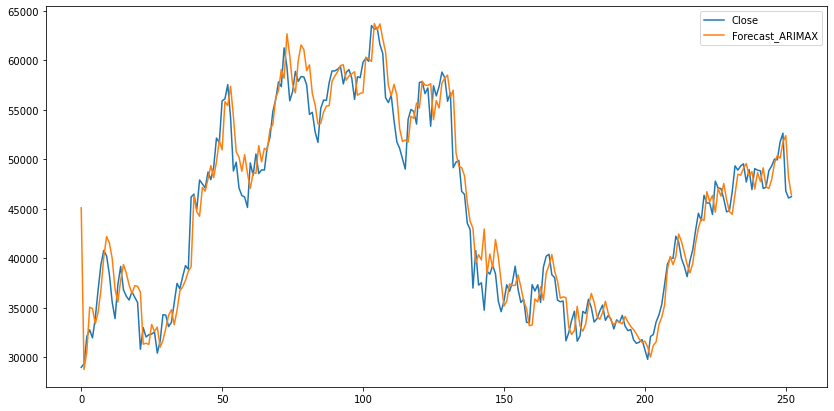

In [37]:
df_valid[["Close", "Forecast_ARIMAX"]].plot(figsize=(14,7))

In [38]:
from sklearn.metrics import mean_squared_error, mean_absolute_error

print("RMSE of Auto ARIMAX: ", np.sqrt(mean_squared_error(df_valid.Close, df_valid.Forecast_ARIMAX)))
print("MAE of Auto ARIMAX: ", mean_absolute_error(df_valid.Close, df_valid.Forecast_ARIMAX))

RMSE of Auto ARIMAX:  2396.74965603269
MAE of Auto ARIMAX:  1720.947606543938


FB PROPHETS MODEL

In [39]:
from prophet.plot import plot_plotly, plot_components_plotly
from prophet import Prophet

In [40]:
df_fb = df_train[['Date','Close']].rename({'Date':'ds', 'Close':'y'}, axis=1)
df_fb.head()

,ds,y
0,2014-09-16,457.334015
1,2014-09-17,424.440002
2,2014-09-18,394.795990
3,2014-09-19,408.903992
4,2014-09-20,398.821014


In [41]:
print(df_fb.dtypes)

ds    datetime64[ns]
y            float64
dtype: object


In [42]:
train_fb = df_fb
test_fb = df_valid[['Date','Close']].rename({'Date':'ds','Close':'y'}, axis=1)

In [43]:
print("Train data shape: ", train_fb.shape)
print("Test data shape: ", test_fb.shape)

Train data shape:  (2293, 2)
Test data shape:  (253, 2)


In [44]:
model_fbp = Prophet()
for feature in exogenous_features:
    model_fbp.add_regressor(feature)
model_fbp.fit(df_train[["Date", "Close"] + exogenous_features].rename(columns={"Date":"ds", "Close":"y"}))
forecast = model_fbp.predict(df_valid[["Date","Close"] + exogenous_features].rename(columns={"Date":"ds"}))
forecast.head()

INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,Close_mean_lag3,Close_mean_lag3_lower,Close_mean_lag3_upper,Close_mean_lag30,...,weekly,weekly_lower,weekly_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2020-12-31,5256.326555,44122.762998,44923.840698,5256.326555,5256.326555,69050.504020,69050.504020,69050.504020,36926.553131,...,4.039041,4.039041,4.039041,23.713776,23.713776,23.713776,0.0,0.0,0.0,44526.274563
1,2021-01-01,5256.805725,28025.487862,28872.587051,5256.805725,5256.805725,42087.730331,42087.730331,42087.730331,23033.480599,...,6.739778,6.739778,6.739778,19.705796,19.705796,19.705796,0.0,0.0,0.0,28471.997158
2,2021-01-02,5257.284894,30093.507981,30910.761664,5257.284894,5257.284894,42412.813385,42412.813385,42412.813385,23210.426842,...,1.367423,1.367423,1.367423,15.514154,15.514154,15.514154,0.0,0.0,0.0,30496.408843
3,2021-01-03,5257.764064,35373.123381,36191.475212,5257.764064,5257.764064,44123.242199,44123.242199,44123.242199,24141.431853,...,6.653718,6.653718,6.653718,11.156806,11.156806,11.156806,0.0,0.0,0.0,35789.458714
4,2021-01-04,5258.243233,34753.983069,35547.725434,5258.243233,5258.243233,46323.041611,46323.041611,46323.041611,24762.475103,...,-24.382306,-24.382306,-24.382306,6.653372,6.653372,6.653372,0.0,0.0,0.0,35179.897167


In [45]:
df_valid["Forecast_Prophet"] = forecast.yhat.values

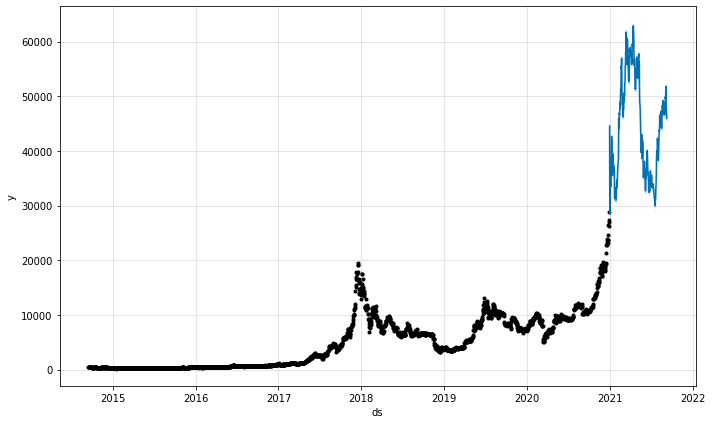

In [46]:
fig1 = model_fbp.plot(forecast)

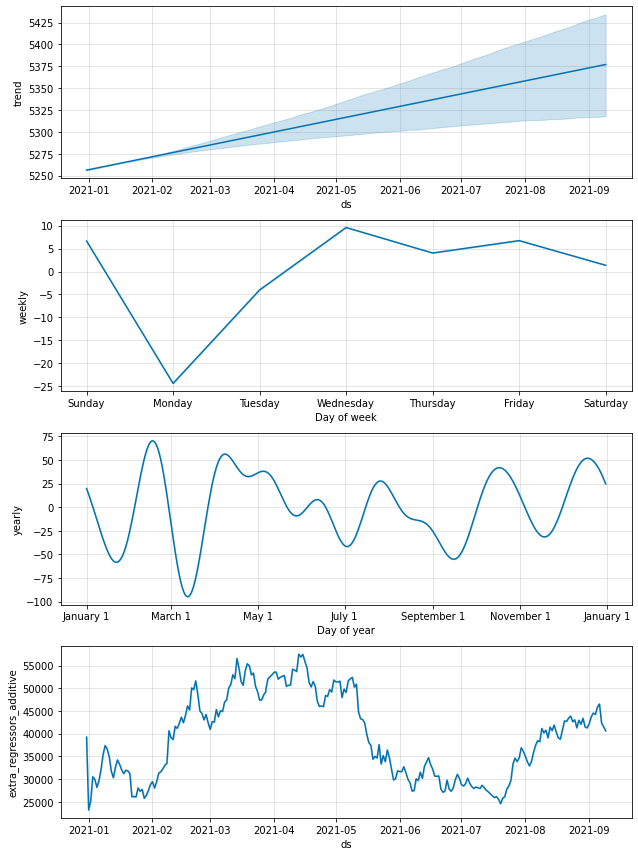

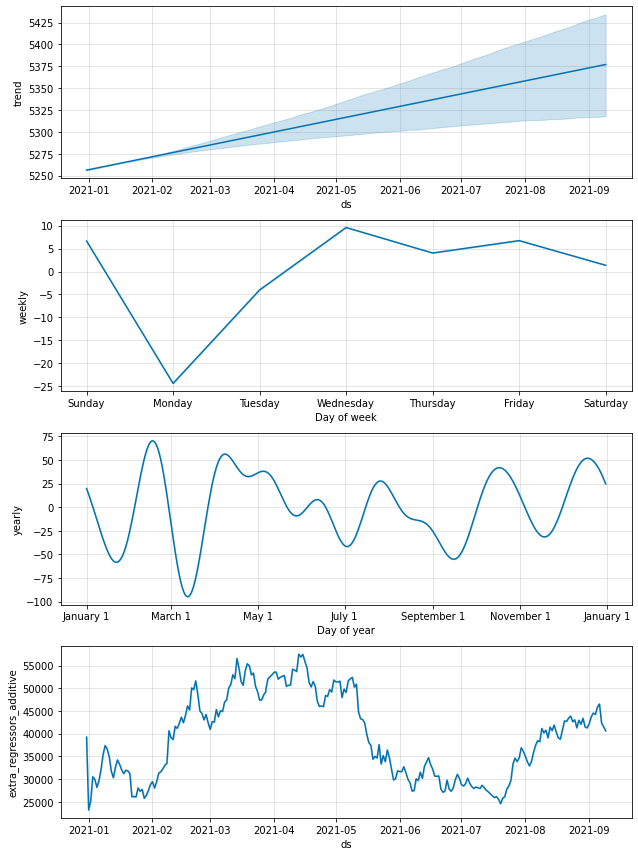

In [47]:
model_fbp.plot_components(forecast)

<AxesSubplot:>

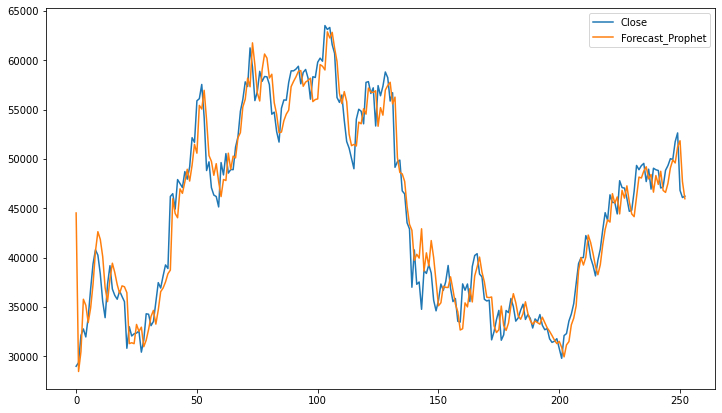

In [48]:
df_valid[["Close", "Forecast_Prophet"]].plot(figsize=(12,7))

In [49]:
test_mae = mean_absolute_error(df_valid["Close"], df_valid["Forecast_Prophet"])
test_rmse = np.sqrt(mean_squared_error(df_valid["Close"], df_valid["Forecast_Prophet"]))

print(f"Prophet's MAE: {test_mae}")
print(f"Prophet's RMSE: {test_rmse}")

Prophet's MAE: 1731.0419728190473
Prophet's RMSE: 2357.3023994070095


LSTM AND RNN

In [50]:
from sklearn.preprocessing import MinMaxScaler
from tensorflow import keras
from tensorflow.keras.layers import Dropout, Dense, LSTM, Activation
from tensorflow.keras.models import Sequential

In [54]:
scaler = MinMaxScaler()
# Normalization data for raw_data
close_price = data.Close.values.reshape(-1,1)
scaled_close = scaler.fit_transform(close_price)
print(scaled_close.shape, np.isnan(scaled_close).any())

# Normalization data for test_data
close_price_test = test_data.Close.values.reshape(-1,1)
scaled_close_test = scaler.fit_transform(close_price_test)
print(scaled_close_test.shape, np.isnan(scaled_close_test).any())

(2293, 1) False
(253, 1) False


In [55]:
print(scaled_close)
print(scaled_close_test)

[[0.00974191]
 [0.0085943 ]
 [0.00756006]
 ...
 [0.93873099]
 [0.94841701]
 [1.        ]]
[[0.        ]
 [0.01079458]
 [0.090591  ]
 [0.10956848]
 [0.08608823]
 [0.14465095]
 [0.22673185]
 [0.30054494]
 [0.34189261]
 [0.32615246]
 [0.27113768]
 [0.19027841]
 [0.14263747]
 [0.24099189]
 [0.29522014]
 [0.22676095]
 [0.2080017 ]
 [0.19678884]
 [0.22110057]
 [0.20486169]
 [0.18973043]
 [0.05286628]
 [0.11605332]
 [0.08886283]
 [0.09528964]
 [0.09752181]
 [0.10341882]
 [0.04147114]
 [0.07674642]
 [0.15404054]
 [0.15268225]
 [0.11920092]
 [0.13145585]
 [0.18864466]
 [0.24550559]
 [0.22967962]
 [0.26498921]
 [0.29750071]
 [0.28699195]
 [0.4983733 ]
 [0.50662334]
 [0.46132353]
 [0.54801912]
 [0.53629564]
 [0.52472127]
 [0.57143699]
 [0.54905462]
 [0.58542417]
 [0.67090209]
 [0.65730246]
 [0.77927707]
 [0.78540392]
 [0.82715329]
 [0.73056032]
 [0.57454225]
 [0.60007448]
 [0.5243832 ]
 [0.50252662]
 [0.49814109]
 [0.46768802]
 [0.59792705]
 [0.56163166]
 [0.62421558]
 [0.56691197]
 [0.57752409]


In [56]:
train_data = scaled_close
test_data = scaled_close_test

In [57]:
train_data.shape, test_data.shape

((2293, 1), (253, 1))

In [58]:
def windowed_dataset(series, time_step):
    dataX, dataY = [],[]
    for i in range(len(series) - time_step-1):
        a = series[i:(i+time_step), 0]
        dataX.append(a)
        dataY.append(series[i+time_step,0])
    return np.array(dataX), np.array(dataY)

In [59]:
X_train, y_train = windowed_dataset(train_data, time_step=100)
X_test, y_test = windowed_dataset(test_data, time_step=100)

In [60]:
X_train.shape, y_train.shape, X_test.shape, y_test.shape

((2192, 100), (2192,), (152, 100), (152,))

In [61]:
# reshape inputs
X_train = X_train.reshape(X_train.shape[0], X_train.shape[1], 1)
X_test = X_test.reshape(X_test.shape[0], X_test.shape[1], 1)

print(X_train.shape)
print(X_test.shape)

(2192, 100, 1)
(152, 100, 1)


In [63]:
# Initialising the LSTM
regressor = Sequential()

# Adding the first LSTM layer and Dropout
regressor.add(LSTM(units=50, return_sequences=True, input_shape=(X_train.shape[1],1)))
regressor.add(Dropout(0.5))

# Adding the second LSTM layer and Dropout
regressor.add(LSTM(units=50, return_sequences=True))
regressor.add(Dropout(0.5))

# Adding the third LSTM layer and Dropout
regressor.add(LSTM(units=50))
regressor.add(Dropout(0.5))

# Adding the output layer
regressor.add(Dense(units=1))

# Compiling the model
regressor.compile(optimizer="adam", loss="mean_squared_error")

In [64]:
regressor.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm (LSTM)                  (None, 100, 50)           10400     
_________________________________________________________________
dropout (Dropout)            (None, 100, 50)           0         
_________________________________________________________________
lstm_1 (LSTM)                (None, 100, 50)           20200     
_________________________________________________________________
dropout_1 (Dropout)          (None, 100, 50)           0         
_________________________________________________________________
lstm_2 (LSTM)                (None, 50)                20200     
_________________________________________________________________
dropout_2 (Dropout)          (None, 50)                0         
_________________________________________________________________
dense (Dense)                (None, 1)                 5

In [65]:
# Fitting the LSTM to the traing set
history = regressor.fit(X_train, y_train,validation_split=0.2, epochs=100, batch_size=32, verbose=1, shuffle=False)

Epoch 1/100
55/55 [==============================] - 9s 92ms/step - loss: 0.0041 - val_loss: 0.0118
Epoch 2/100
55/55 [==============================] - 4s 78ms/step - loss: 0.0122 - val_loss: 0.0230
Epoch 3/100
55/55 [==============================] - 4s 78ms/step - loss: 0.0036 - val_loss: 0.0045
Epoch 4/100
55/55 [==============================] - 4s 78ms/step - loss: 0.0030 - val_loss: 0.0045
Epoch 5/100
55/55 [==============================] - 4s 79ms/step - loss: 0.0026 - val_loss: 0.0027
Epoch 6/100
55/55 [==============================] - 4s 78ms/step - loss: 0.0022 - val_loss: 0.0039
Epoch 7/100
55/55 [==============================] - 4s 78ms/step - loss: 0.0019 - val_loss: 0.0032
Epoch 8/100
55/55 [==============================] - 4s 78ms/step - loss: 0.0019 - val_loss: 0.0038
Epoch 9/100
55/55 [==============================] - 4s 79ms/step - loss: 0.0018 - val_loss: 0.0044
Epoch 10/100
55/55 [==============================] - 4s 78ms/step - loss: 0.0019 - val_loss: 0.0043

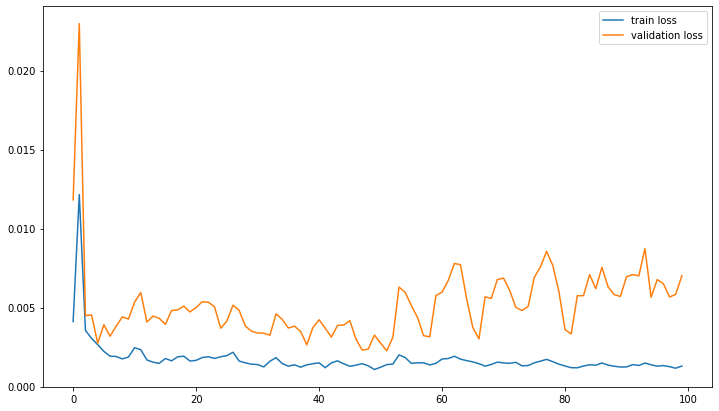

In [66]:
plt.figure(figsize=(12,7))
plt.plot(history.history["loss"], label="train loss")
plt.plot(history.history["val_loss"], label="validation loss")
plt.legend()

In [67]:
# Prediction
train_predict = regressor.predict(X_train)
test_predict = regressor.predict(X_test)

In [68]:
# Transformation to original form
y_train_inverse = scaler.inverse_transform(y_train.reshape(-1,1))
y_test_inverse = scaler.inverse_transform(y_test.reshape(-1,1))
train_predict_inverse = scaler.inverse_transform(train_predict)
test_predict_inverse = scaler.inverse_transform(test_predict)

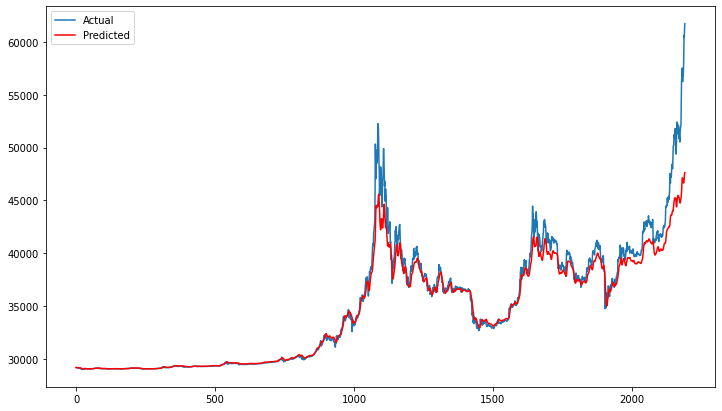

In [69]:
# Prediction on Training data
plt.figure(figsize=(12,7))
plt.plot(y_train_inverse.flatten(), label="Actual")
plt.plot(train_predict_inverse.flatten(),"r", label="Predicted")
plt.legend()

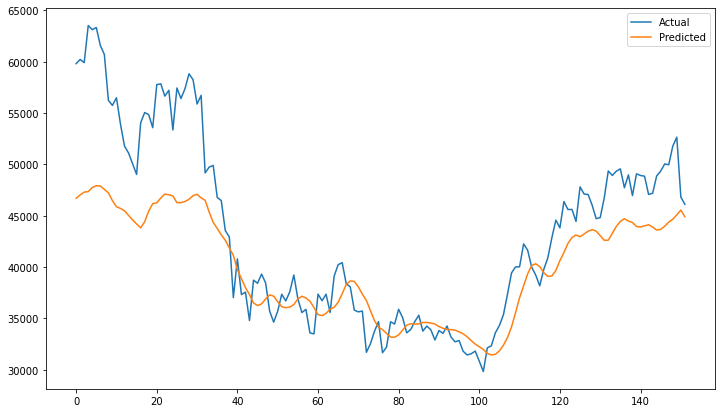

In [70]:
# Prediction on Test data
plt.figure(figsize=(12,7))
plt.plot(y_test_inverse.flatten(),label="Actual")
plt.plot(test_predict_inverse.flatten(),label="Predicted")
plt.legend()

In [71]:
train_RMSE = np.sqrt(mean_squared_error(y_train, train_predict))
train_MAE = np.sqrt(mean_absolute_error(y_train, train_predict))

LSTM_RMSE = np.sqrt(mean_squared_error(y_test, test_predict))
LSTM_MAE = np.sqrt(mean_absolute_error(y_test, test_predict))

In [72]:
print("Train RMSE: ", train_RMSE)
print("Train MAE: ", train_MAE)

print("Test RMSE: ", LSTM_RMSE)
print("Test MAE: ", LSTM_MAE)

Train RMSE:  0.043704595780323804
Train MAE:  0.13616133869234193
Test RMSE:  0.16351395509614372
Test MAE:  0.34707897110063296


In [74]:
from plotly.offline import init_notebook_mode,iplot
init_notebook_mode(connected=True)
import plotly.graph_objs as go

In [75]:
trace1 = go.Scatter(
    x = df_valid['Date'],
    y = df_valid['Close'],
    mode = 'lines',
    name = 'Close'
)

trace2 = go.Scatter(
    x = df_valid['Date'],
    y = df_valid['Forecast_ARIMAX'],
    mode = 'lines',
    name = 'ARIMA Forecast'
)
trace3 = go.Scatter(
    x = df_valid['Date'],
    y = df_valid['Forecast_Prophet'],
    mode = 'lines',
    name = 'Prophet Forecast'
)

trace4 = go.Scatter(
    x = df_valid['Date'],
    y = df_valid['Close'],
    mode = 'lines',
    name = 'Forecast_LSTM'
)


layout = dict(
    title='Model Comparison ',
    xaxis=dict(
        rangeselector=dict(
            buttons=list([
                dict(count=1,
                     label='1m',
                     step='month',
                     stepmode='backward'),
                dict(count=6,
                     label='6m',
                     step='month',
                     stepmode='backward'),
                dict(step='all')
            ])
        ),
        rangeslider=dict(
            visible = True
        ),
        type='date'
    )
)

data = [trace1,trace2,trace3,trace4]
fig = dict(data=data, layout=layout)
iplot(fig, filename = "Time Series with Rangeslider")